In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Consumption growth model with lognormal distribution is given by

\begin{equation}
\begin{split}
\log{\tilde{g}} &= 0.02 + 0.02\epsilon + \nu
\end{split}            
\end{equation}


**Q: Simulate ε with (at least) 10e4 random draws from a standard normal distribution, and simulate ν with (at least) 104 random draws from a standard uniform distribution**

In [3]:
#simulating episolon
e = np.random.standard_normal(100000)

#simulating nu
temp = np.random.uniform(0,1,100000)
v = list(map(lambda x : 0 if x > 0.017 else np.log(0.65), temp))

In [4]:
#Calculating consumption growth
g = np.exp(0.02 + 0.002 * e + v)

Formula for calculatng the pricing kernel for power utility is given as
\begin{equation}
\begin{split}
\tilde{M} &= 0.99 * \tilde{g} ^{ -\gamma}
\end{split}            
\end{equation}


**Q: Use the simulated distribution of consumption growth to calculate the pricing kernel for power utility for γ in the range [1,4], in increments of 0.1 (or less).**

In [5]:
#Calculating pricing kernel for power utility
gammaRange = np.arange(1,4.01,0.05)
results = []
for i in gammaRange:
    tempM = 0.99 * g ** (-i)
    tempStd = tempM.std()
    tempMean = tempM.mean()
    tempList = [i,tempStd,tempMean,tempStd/tempMean]
    results.append(tempList)

**Q: Calculate the mean and standard deviation of the pricing kernel for each values of γ, and plot the ratio σm/μm (on the vertical axis) vs γ (on the horizontal axis).**

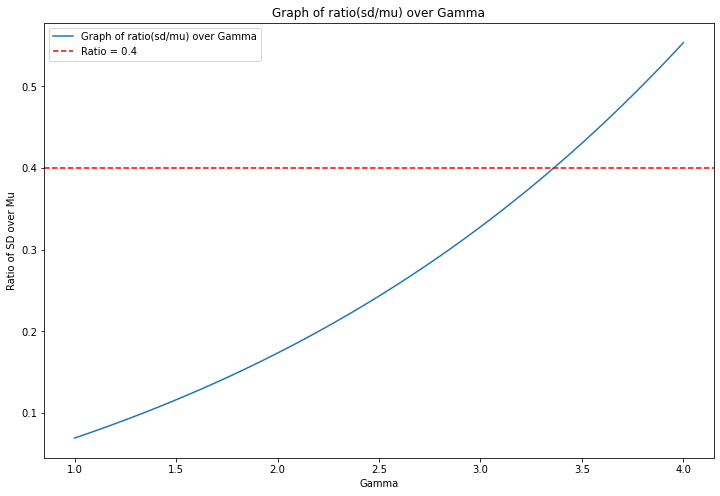

In [6]:
# Putting data into dataframe
df = pd.DataFrame(results, columns=['gamma','mean','std','ratio'])

#Plotting the graph
fig = plt.figure(figsize = (12, 8)) # For your plot initialization

sub = fig.add_subplot(111, # For adding a subplot
                      ylabel = "Ratio of SD over Mu",
                      xlabel = "Gamma",
                      title = "Graph of ratio(sd/mu) over Gamma")

sub.plot(df['gamma'],df['ratio'], label ="Graph of ratio(sd/mu) over Gamma" )

#sub.hlines(y=0.4, xmin=0, xmax= 4,color='r', linestyle = '--')
sub.axhline(y=0.4, xmax = 3.4, color='r', linestyle='--', label = 'Ratio = 0.4')

fig2 = plt.gcf() 
plt.legend()


**Q: Take note of the smallest value of γ for which σm/μm > 0.4 (i.e., for which the Hansen–Jagannathan bound is satisfied)**

In [8]:
smallestGamma = df[df['ratio'] > 0.4].sort_values(by = ['ratio'],ascending = True).head(1)['gamma'].values[0]
print(f"Smallest value of gamma is {round(smallestGamma,2)} for which ratio is > 0.4.")

Smallest value of gamma is 3.4 for which ratio is > 0.4.


**Q: Briefly explain the economic significance of this result**

<u>Answer</u>
<br>
Hansen-Jagannathan bound helps to set lower bound on volatility of pricing kernel whicn in turn becomes the lower bound of the investor degree of relative risk aversion as it states that the ratio of the standard deviation of the pricing kernel to its mean must be equal or greater than the sharpe ratio of any portfolio. 

In this case, after factoring in natural disaster, it gives a gamma value of 3.4. which represents the lower bound of the investor degree of relative risk aversion in order to obtain the observed risk premium of 7% (considering sharpe ratio of US stock market to be 0.4 and sd of 17%). Gamma value of 3.4 is a reasonable low level of risk aversion to satisfy the H-J bound thus no equity premium puzzle is present. In addition, it also tells us that the marginal utility for this group of investors is at least 1 / c^(3.40).

In addition, it tells us that investors with a lower degree of relative risk aversion than 3.4 will invest in a portfolio with a sharpe ratio less than 0.4 in order to maximise their utility. 